Inner product between vectors ( overlap ) using swap test. 

In [56]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_histogram
from IPython.display import display, Latex
from math import pi
import math
from qiskit.circuit.library import QFT, CUGate
from qiskit.circuit.library import UGate

import numpy as np

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# circuit.h(qreg_q[1])
circuit.x(qreg_q[1])

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q)
circuit.cswap(qreg_q[2], qreg_q[0], qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q)

In [57]:
state = Statevector(circuit)
state.draw(output="Latex")


<IPython.core.display.Latex object>

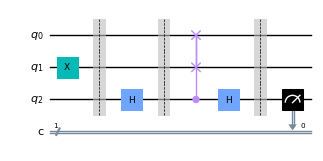

In [58]:
circuit.measure(qreg_q[2], creg_c[0])
circuit.draw(output='mpl', scale=0.5)

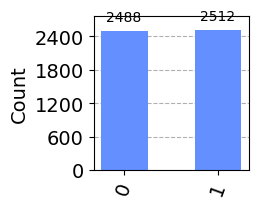

In [59]:

backend = Aer.get_backend('aer_simulator_statevector') 
circuit.save_statevector()  
result = backend.run(transpile(circuit, backend), shots=5000).result()
out_state = result.get_statevector()
plot_histogram(result.get_counts(), figsize=(2,2))